In [6]:
# Dependencies
# from census import Census
# from config import (census_key, gkey, api_key)
from config import (poly_key, nomics_key)
import numpy as np
import pandas as pd
import requests
import json
import pprint
import time
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import urllib.request

### Polygon

In [7]:
# Website url for api_key tools: https://polygon.io/docs/get_v3_reference_tickers_anchor
# https://github.com/polygon-io/client-python example

# url = f"https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/day/2020-06-01/2020-06-17?
# query_url = url + "apiKey=" + poly_key + "&q=" + city

# # Get polygon data
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()

# # Get the crypto from the response
# print(f"The crypto API responded with: {weather_json}.")

### Nomics

#### History Url

In [8]:
url_history_example = f"https://api.nomics.com/v1/market-cap/history?key={nomics_key}&start=2018-04-14T00%3A00%3A00Z&end=2018-05-14T00%3A00%3A00Z"
url_history_2021 = f"https://api.nomics.com/v1/market-cap/history?key={nomics_key}&start=2020-01-01T00%3A00%3A00Z&end=2020-02-01T00%3A00%3A00Z"


##### Pandemic Data History 

In [9]:
start_date = "2020-01-01"
end_date = "2021-10-31"
pandemic_url_history = f"https://api.nomics.com/v1/market-cap/history?key={nomics_key}&start={start_date}T00%3A00%3A00Z&end={end_date}T00%3A00%3A00Z"

# text file to hold the data
pandemic_all_data_file = open('pandemic_all_data_file.txt', 'w')
pandemic_timestamp_file = open('pandemic_timestamp_file.txt', 'w')
pandemic_market_cap_file = open('pandemic_market_cap_file.txt', 'w')


print(pandemic_url_history)                      

https://api.nomics.com/v1/market-cap/history?key=d196e08e848ed27d01a1819a48126b4a7751f034&start=2020-01-01T00%3A00%3A00Z&end=2021-10-31T00%3A00%3A00Z


In [70]:
#Kevin
response = requests.get(pandemic_url_history)
response_json = response.json()
market_closing_df = pd.read_json(json.dumps(response_json))
# pprint.pprint(response_json)
market_closing_df

,timestamp,market_cap
0,2020-01-01 00:00:00+00:00,191922590005
1,2020-01-02 00:00:00+00:00,186571573462
2,2020-01-03 00:00:00+00:00,195602913134
3,2020-01-04 00:00:00+00:00,196440106894
4,2020-01-05 00:00:00+00:00,196973550784
...,...,...
665,2021-10-27 00:00:00+00:00,2680357655522
666,2021-10-28 00:00:00+00:00,2807187711569
667,2021-10-29 00:00:00+00:00,2875950180021
668,2021-10-30 00:00:00+00:00,2836873852364


NameError: name 'mdates' is not defined

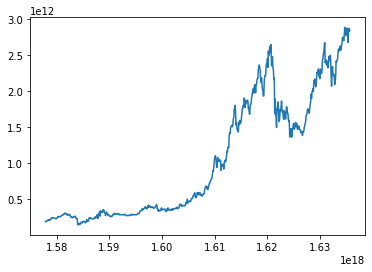

In [29]:
#Kevin
data = market_closing_df
data['timestamp'] = pd.to_numeric(data['timestamp'])

fig, ax = plt.subplots()
ax.plot('timestamp', 'market_cap', data=data)

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Round to nearest years.
datemin = np.datetime64(data['timestamp'][0], 'Y')
datemax = np.datetime64(data['timestamp'][-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# Format the coords message box, i.e. the numbers displayed as the cursor moves
# across the axes within the interactive GUI.
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.format_ydata = lambda x: f'${x:.2f}'  # Format the price.
ax.grid(True)

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()

plt.show()

In [20]:


# link for history
pandemic_url_history

# recieve link and convert raw data to json

# find out how many dicts are in the list
number_of_dicts = len(response)
print(number_of_dicts)

# lists of list
pandemic_timestamp = []
pandemic_market_cap = []

# we want to go each list... since we are doing by numbers, we will do the range of 0 to the amount in the url
number_of_dicts = list(range(0, number_of_dicts))

# for loop: x is going to become number_of_dicts each time...0, once it goes through the code then x changes to 1, repeat etc.
for x in number_of_dicts:
    timestamp_string = response[x]['timestamp']
    new_timestamp_String = timestamp_string.replace('T00:00:00Z', '')
    pandemic_timestamp.append(new_timestamp_String)
    
    
    pandemic_market_cap.append(response[x]['market_cap'])
    market_cap_string = response[x]['market_cap']


    pandemic_all_data_file.write(f"{new_timestamp_String}, {market_cap_string}\n")
    pandemic_timestamp_file.write(f"{new_timestamp_String}\n")
    pandemic_market_cap_file.write(f"{market_cap_string}\n")

pandemic_all_data_file.close()
pandemic_timestamp_file.close()
pandemic_market_cap_file.close()



[{'timestamp': '2020-01-01T00:00:00Z', 'market_cap': '191896382582'},
 {'timestamp': '2020-01-02T00:00:00Z', 'market_cap': '186548731052'},
 {'timestamp': '2020-01-03T00:00:00Z', 'market_cap': '195595034244'},
 {'timestamp': '2020-01-04T00:00:00Z', 'market_cap': '196429864071'},
 {'timestamp': '2020-01-05T00:00:00Z', 'market_cap': '196945748264'},
 {'timestamp': '2020-01-06T00:00:00Z', 'market_cap': '208604064487'},
 {'timestamp': '2020-01-07T00:00:00Z', 'market_cap': '214791421698'},
 {'timestamp': '2020-01-08T00:00:00Z', 'market_cap': '212809651059'},
 {'timestamp': '2020-01-09T00:00:00Z', 'market_cap': '207241012437'},
 {'timestamp': '2020-01-10T00:00:00Z', 'market_cap': '217500782761'},
 {'timestamp': '2020-01-11T00:00:00Z', 'market_cap': '214309206691'},
 {'timestamp': '2020-01-12T00:00:00Z', 'market_cap': '218775906801'},
 {'timestamp': '2020-01-13T00:00:00Z', 'market_cap': '216753916655'},
 {'timestamp': '2020-01-14T00:00:00Z', 'market_cap': '241494164019'},
 {'timestamp': '2020

In [132]:
pandemic_timestamp

#You can remove a word from a string using str.replace ()
myString = response[0]['timestamp']
newString = myString.replace('T00:00:00Z', '')
newString

'2020-01-01'

#### Market Url

In [133]:
url_3 = f"https://api.nomics.com/v1/markets?key={nomics_key}"
url_4 = f"https://api.nomics.com/v1/markets?key={nomics_key}&quote-currency=USD&convert=USD&per-page=100&page=1"

#### Currencies Url

In [134]:
# Website url for api_key tools: https://nomics.com/docs/
# steps for help: https://github.com/TaylorFacen/nomics-python
# Currencie Codes: https://nomics.com/docs/#operation/getCurrenciesTicker

url = f"https://api.nomics.com/v1/?key={nomics_key}"
url_2 = f"https://api.nomics.com/v1/currencies/ticker?key={nomics_key}&ids=BTC,ETH,XRP&interval=1d,30d&convert=EUR&per-page=100&page=1"


#### Link's Url

In [135]:

print(" - " * 10)
print("Url's are below...")
# print("")
# print(f"https://api.nomics.com/v1/currencies/ticker?key={nomics_key}&ids=BTC,ETH,XRP&interval=1d,30d&convert=EUR&per-page=100&page=1")
# print("")
# print(f"Here is a link of the full market of nomics: https://api.nomics.com/v1/markets?key={nomics_key}")
# print("")
# print(f'Here is a link of the market of Converted US, Active nomics: https://api.nomics.com/v1/markets?key={nomics_key}&convert=USD&"active"&per-page=10')
# print("")
# print(f'Here is a link of the History example nomics: https://api.nomics.com/v1/market-cap/history?key={nomics_key}&start=2018-04-14T00%3A00%3A00Z&end=2018-05-14T00%3A00%3A00Z')
# print("")
# print(f'Here is a link of the History example nomics: https://api.nomics.com/v1/market-cap/history?key={nomics_key}&start=2020-01-01T00%3A00%3A00Z&end=2020-02-01T00%3A00%3A00Z')





 -  -  -  -  -  -  -  -  -  - 
Url's are below...


In [136]:
print(urllib.request.urlopen(url_2).read())

HTTPError: HTTP Error 429: Too Many Requests

HTTPError: HTTP Error 429: Too Many Requests

### Main Code

In [ ]:
# crypto_intro = 'Welcome, this is our project! We will be talking about crypto!'
# print(f"{crypto_intro}")

# url_input = input(f"Please pick a url in the following list: {url_list}")



Welcome, this is our project! We will be talking about crypto!
